### Importing Nessecary Libraries 

In [6]:
import numpy as np
from numpy import mean
import pandas as pd 
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and Concatinating the Alumni Data Set 

In [7]:
#Merging all sheets into one dataframe 
datafinal = pd.concat(pd.read_excel('UMD Alumni Association Dataset.xlsx', sheet_name=None,header=0), ignore_index=True)
datafinal

#Code : https://pbpython.com/pandas-excel-tabs.html
#622 rows and 17 columns 

C:\Users\28149\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,Baltimore Orioles Bullpen Pregame,PEAOB,CP AA-Baltimore Orioles Bullpen Pregame,PDBA,CP DMV- Baltimore,PS9,CP Social- General,2014-05-13,2,31,0,0.000000,0,0.000000
618,50th Reunion,PEZ50,CP AAE-50th Reunion,PDON,CP DMV- On Campus,PS3,CP Social- Emeriti,2014-05-21,76,67,0,0.000000,27,0.355263
619,Ring Ceremony,PEZRC,CP AAE-Ring Ceremony,PDON,CP DMV- On Campus,PSS,CP Social- Students,2014-05-21,68,29,0,0.000000,4,0.058824
620,Terps on the Hill,PEZTH,CP AAE-Terps on the Hill,PDDC,CP DMV- Washington DC,PD9,CP Advocacy- General,2014-06-12,118,34,0,0.000000,16,0.135593


### Data Cleansing 

In [8]:
datafinal[['Area', 'City']] = datafinal['Location Description'].str.split('-', expand=True)
datafinal[['Group', 'Type']] = datafinal['Group Description'].str.split('-', expand=True)
print(datafinal)

                                            Event Name Activity Code  \
0                              Ocean City Summer Party         PEZOC   
1    Neurodiversity on Campus and in the Workplace ...         PEAPC   
2                                Northern NJ Terps TPN         PEANJ   
3    Philly Terps: Young Alumni Happy Hour Summer S...         PEAP1   
4             Philly Terps Suite Night at the Ballpark         PEAP4   
..                                                 ...           ...   
617                 Baltimore Orioles Bullpen Pregame          PEAOB   
618                                      50th Reunion          PEZ50   
619                                     Ring Ceremony          PEZRC   
620                                  Terps on the Hill         PEZTH   
621                NY Terps Alumnae Networking Dinner          PEANA   

                         Activity Description Location Code  \
0              CP AAE-Ocean City Summer Party          PDES   
1        

In [9]:
uniqueValuesArea = datafinal['Area'].unique()
uniqueValuesArea

array(['CP DMV', 'CP Online', 'CP Northeast', 'CP West Coast', 'CP West',
       'CP Southeast', 'CP DC', 'CP Northeast ', 'CP Social',
       'CP International', 'CP USA', 'CP Norhteast'], dtype=object)

In [10]:
datafinal.replace("CP Norhteast", "CP Northeast", inplace=True) #Spelling Error 
datafinal.replace("CP Northeast ", "CP Northeast", inplace=True) # Spacing Error 

In [11]:
uniqueValuesArea = datafinal['Area'].unique()
uniqueValuesArea

array(['CP DMV', 'CP Online', 'CP Northeast', 'CP West Coast', 'CP West',
       'CP Southeast', 'CP DC', 'CP Social', 'CP International', 'CP USA'],
      dtype=object)

In [12]:
uniqueValuesGroup = datafinal['Group'].unique()
uniqueValuesGroup

array(['CP Social', 'CP ProDev', 'CP Athletics', 'CP Prodev',
       'CP Cultural', 'CP Affinity', 'CP Service', 'CP Advocacy',
       'CP Affiniy', 'CP General', 'CP D&I', 'CP Career', 'CP Campaign',
       'CP Pro Dev', 'CP Stewardship', 'CP Cultivation', 'CP DMV',
       'CP Membership', 'CP Stewarship'], dtype=object)

In [13]:
datafinal.replace("CP Affiniy", "CP Affinity", inplace=True)
datafinal.replace("CP Stewarship", "CP Stewardship", inplace=True)
datafinal.replace("CP Prodev", "CP ProDev", inplace=True)
datafinal.replace("CP Pro Dev", "CP ProDev", inplace=True)

In [14]:
uniqueValuesGroup = datafinal['Group'].unique()
uniqueValuesGroup

array(['CP Social', 'CP ProDev', 'CP Athletics', 'CP Cultural',
       'CP Affinity', 'CP Service', 'CP Advocacy', 'CP General', 'CP D&I',
       'CP Career', 'CP Campaign', 'CP Stewardship', 'CP Cultivation',
       'CP DMV', 'CP Membership'], dtype=object)

### Data Understanding 

In [15]:
datafinal.dtypes

Event Name                                 object
Activity Code                              object
Activity Description                       object
Location Code                              object
Location Description                       object
Group Code                                 object
Group Description                          object
Event Date                         datetime64[ns]
Participated                                int64
Average Age                                 int64
First Time Attendees                        int64
Percentage First Time Attendees           float64
Major Prospects                             int64
Percentage Major Prospect                 float64
Area                                       object
City                                       object
Group                                      object
Type                                       object
dtype: object

In [16]:
datafinal.sort_values(by='Event Date', ascending=False)

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Area,City,Group,Type
69,Tucson Terps: Joint Football Watch Party with ...,PEAT6,CP AA-Tucson Terps Joint Football Watch,PWTU,CP West Coast-Tucson,PA9,CP Athletics-General,2019-11-30,1,64,1,1.000000,0,0.000000,CP West Coast,Tucson,CP Athletics,General
68,Football Tailgate,PEZFT,CP AAE-Football Tailgate,PDON,CP DMV-On Campus,PA9,CP Athletics-General,2019-11-23,38,54,1,0.026316,0,0.000000,CP DMV,On Campus,CP Athletics,General
67,CIVICUS 20th Anniversary Celebration,PEAC5,CP AA-CIVICUS 20th Anniv Celebration,PDON,CP DMV-On Campus,PSC,CP Social-CIVICUS,2019-11-17,29,31,2,0.068966,0,0.000000,CP DMV,On Campus,CP Social,CIVICUS
66,Leadership Conference,PEALC,CP AA-Leadership Conference,PDON,CP DMV-On Campus,PC9,CP ProDev-General,2019-11-15,100,38,4,0.040000,1,0.010000,CP DMV,On Campus,CP ProDev,General
65,Patent Primer Webinar,PEAPD,CP AA-Pro/Per Development Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-11-13,49,41,7,0.142857,1,0.020408,CP Online,Webinar,CP ProDev,General
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,Prince George's Terps WBB Suite,PEASP,CP AA-Prince George's Terps WBB Suite,PDON,CP DMV- On Campus,PA9,CP Athletics- General,2014-03-02,19,60,0,0.000000,5,0.263158,CP DMV,On Campus,CP Athletics,General
611,Tampa Day at the Races,PEATD,CP AA-Tampa Day at the Races,PSTA,CP Southeast- Tampa,PS9,CP Social- General,2014-02-01,17,66,0,0.000000,7,0.411765,CP Southeast,Tampa,CP Social,General
610,2013 Military Bowl,PEZMI,CP AAE-2013 Military Bowl,PDAN,CP DMV- Annapolis,PA9,CP Athletics- General,2013-12-27,224,47,0,0.000000,34,0.151786,CP DMV,Annapolis,CP Athletics,General
609,Awards Gala,PEZAG,CP AAE-Awards Gala,PDON,CP DMV- On Campus,PH9,CP Stewardship- General,2013-10-25,340,53,0,0.000000,131,0.385294,CP DMV,On Campus,CP Stewardship,General


In [17]:
datafinal.tail()

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Area,City,Group,Type
617,Baltimore Orioles Bullpen Pregame,PEAOB,CP AA-Baltimore Orioles Bullpen Pregame,PDBA,CP DMV- Baltimore,PS9,CP Social- General,2014-05-13,2,31,0,0.0,0,0.000000,CP DMV,Baltimore,CP Social,General
618,50th Reunion,PEZ50,CP AAE-50th Reunion,PDON,CP DMV- On Campus,PS3,CP Social- Emeriti,2014-05-21,76,67,0,0.0,27,0.355263,CP DMV,On Campus,CP Social,Emeriti
619,Ring Ceremony,PEZRC,CP AAE-Ring Ceremony,PDON,CP DMV- On Campus,PSS,CP Social- Students,2014-05-21,68,29,0,0.0,4,0.058824,CP DMV,On Campus,CP Social,Students
620,Terps on the Hill,PEZTH,CP AAE-Terps on the Hill,PDDC,CP DMV- Washington DC,PD9,CP Advocacy- General,2014-06-12,118,34,0,0.0,16,0.135593,CP DMV,Washington DC,CP Advocacy,General
621,NY Terps Alumnae Networking Dinner,PEANA,CP AA-NY Terps Alumnae Networking Dinner,PNNY,CP Northeast- New York,PCW,CP ProDev- Alumnae,2014-06-24,44,41,0,0.0,9,0.204545,CP Northeast,New York,CP ProDev,Alumnae


In [18]:
datafinal.head(5)

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Area,City,Group,Type
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476,CP DMV,Eastern Shore,CP Social,General
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000,CP Online,Webinar,CP ProDev,General
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429,CP Northeast,NNJ,CP ProDev,General
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000,CP Northeast,Philadelphia,CP Social,General
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000,CP Northeast,Philadelphia,CP Social,General


In [19]:
datafinal.describe()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,44.803859,40.117363,13.456592,0.276282,5.966238,0.102214
std,93.165049,9.741459,41.103936,0.242273,14.123466,0.131444
min,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,33.000000,1.000000,0.068523,0.000000,0.000000
50%,20.000000,40.000000,4.000000,0.237327,1.000000,0.058824
75%,44.750000,46.000000,11.000000,0.444444,5.000000,0.166667
max,1657.000000,75.000000,702.000000,1.000000,131.000000,0.818182


### Checking for Missing Values and Outliers 

In [20]:
np.where(datafinal.isnull() == True)
#datafinal.isnull()

(array([], dtype=int64), array([], dtype=int64))

<AxesSubplot:>

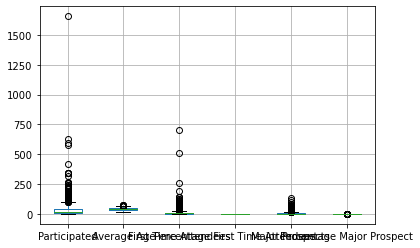

In [21]:
numeric_cols = ['Participated','Average Age', 'First Time Attendees', 'Percentage First Time Attendees' , 'Major Prospects', 'Percentage Major Prospect']
datafinal.boxplot(numeric_cols)

### Identify all types of events and locations

In [22]:
uniqueValuesCode = datafinal['Group Code'].unique()
uniqueValuesCode

array(['PS9', 'PC9', 'PSA', 'PSZ', 'PC4', 'PA9', 'PU9', 'PAG', 'PSY',
       'PQB', 'PQL', 'PO9', 'PUB', 'PCZ', 'PSC', 'PD9', 'PQK', 'P99',
       'PAZ', 'PVW', 'PCS', 'PAB', 'PUU', 'PAY', 'POB', 'PG9', 'PQX',
       'PCW', 'PHM', 'PIZ', 'PSL', 'PSS', 'PH9', 'PMM', 'PST', 'PI9',
       'PCC', 'PUL', 'PS3', 'PUZ', 'PM9', 'PC10', 'PC11', 'POO', 'PSK',
       'PSB', 'PSO', 'PSX', 'POC'], dtype=object)

### Breaking down the date variable 

In [23]:
#Create new dataframe with additional variables 

datafinal['date'] = pd.to_datetime(datafinal['Event Date'],format='%Y%m%d')
datafinal['year'] = pd.DatetimeIndex(datafinal['date']).year
datafinal['month'] = pd.DatetimeIndex(datafinal['date']).month
datafinal['day'] = pd.DatetimeIndex(datafinal['date']).day
datafinal['dayofweek'] = pd.DatetimeIndex(datafinal['date']).day_name()
datafinal

#Code used : https://www.codegrepper.com/code-examples/python/separate+year+and+month+from+date+in+python


,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description,Event Date,Participated,Average Age,...,Percentage Major Prospect,Area,City,Group,Type,date,year,month,day,dayofweek
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,...,0.190476,CP DMV,Eastern Shore,CP Social,General,2019-07-06,2019,7,6,Saturday
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,...,0.000000,CP Online,Webinar,CP ProDev,General,2019-07-10,2019,7,10,Wednesday
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,...,0.071429,CP Northeast,NNJ,CP ProDev,General,2019-07-11,2019,7,11,Thursday
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,...,0.000000,CP Northeast,Philadelphia,CP Social,General,2019-07-11,2019,7,11,Thursday
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,...,0.000000,CP Northeast,Philadelphia,CP Social,General,2019-07-14,2019,7,14,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,Baltimore Orioles Bullpen Pregame,PEAOB,CP AA-Baltimore Orioles Bullpen Pregame,PDBA,CP DMV- Baltimore,PS9,CP Social- General,2014-05-13,2,31,...,0.000000,CP DMV,Baltimore,CP Social,General,2014-05-13,2014,5,13,Tuesday
618,50th Reunion,PEZ50,CP AAE-50th Reunion,PDON,CP DMV- On Campus,PS3,CP Social- Emeriti,2014-05-21,76,67,...,0.355263,CP DMV,On Campus,CP Social,Emeriti,2014-05-21,2014,5,21,Wednesday
619,Ring Ceremony,PEZRC,CP AAE-Ring Ceremony,PDON,CP DMV- On Campus,PSS,CP Social- Students,2014-05-21,68,29,...,0.058824,CP DMV,On Campus,CP Social,Students,2014-05-21,2014,5,21,Wednesday
620,Terps on the Hill,PEZTH,CP AAE-Terps on the Hill,PDDC,CP DMV- Washington DC,PD9,CP Advocacy- General,2014-06-12,118,34,...,0.135593,CP DMV,Washington DC,CP Advocacy,General,2014-06-12,2014,6,12,Thursday


In [24]:
datafinal.dtypes

Event Name                                 object
Activity Code                              object
Activity Description                       object
Location Code                              object
Location Description                       object
Group Code                                 object
Group Description                          object
Event Date                         datetime64[ns]
Participated                                int64
Average Age                                 int64
First Time Attendees                        int64
Percentage First Time Attendees           float64
Major Prospects                             int64
Percentage Major Prospect                 float64
Area                                       object
City                                       object
Group                                      object
Type                                       object
date                               datetime64[ns]
year                                        int64


### Simple Data Analysis 

year
2013      3
2014     54
2015     81
2016     59
2017     45
2018    196
2019    184
Name: Event Name, dtype: int64


Text(0, 0.5, 'Number of Events')

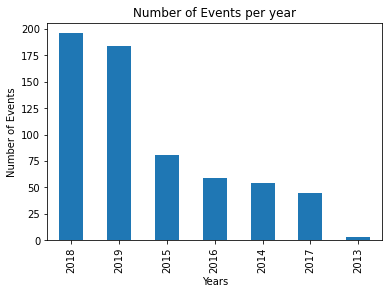

In [25]:
# Analysis 1. Number of Events by year
countyr = datafinal.groupby("year")['Event Name'].agg('count')
print(countyr)

eventsy = datafinal['year'].value_counts()
eventsy.plot(kind='bar')

plt.title('Number of Events per year')
plt.xlabel('Years')
plt.ylabel('Number of Events')

month
1     36
2     66
3     75
4     83
5     37
6     38
7     19
8     29
9     54
10    82
11    66
12    37
Name: Event Name, dtype: int64


Text(0, 0.5, 'Number of Events')

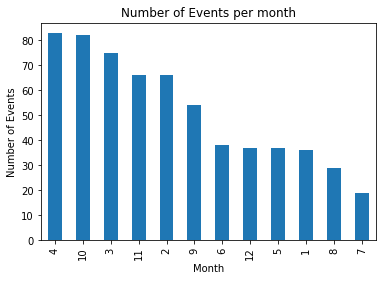

In [26]:
# Analysis 3. Count by month
countm = datafinal.groupby("month")['Event Name'].agg('count')
print(countm)

eventsm = datafinal['month'].value_counts()
eventsm.plot(kind='bar')

plt.title('Number of Events per month')
plt.xlabel('Month')
plt.ylabel('Number of Events')

In [27]:
datafinal.replace("Norhteast", "Northeast", inplace=True)

Group
CP Advocacy        14
CP Affinity         7
CP Athletics      138
CP Campaign         3
CP Career           1
CP Cultivation      8
CP Cultural         8
CP D&I              1
CP DMV              1
CP General          3
CP Membership       4
CP ProDev         138
CP Service         31
CP Social         244
CP Stewardship     21
Name: Event Name, dtype: int64


Text(0, 0.5, 'Number of Events')

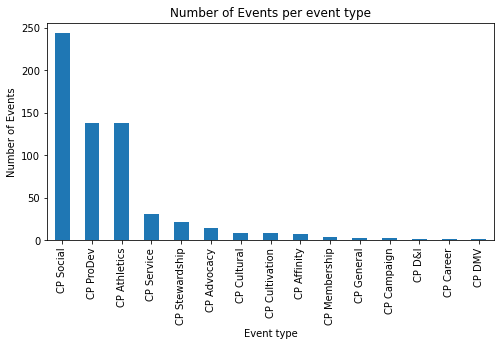

In [28]:
counttype = datafinal.groupby("Group")['Event Name'].agg('count')
print(counttype)

eventsT = datafinal['Group'].value_counts()
eventsT.plot(kind='bar', figsize=(8,4))

plt.title('Number of Events per event type')
plt.xlabel('Event type')
plt.ylabel('Number of Events')

Area
CP DC                 2
CP DMV              350
CP International      2
CP Northeast         79
CP Online            42
CP Social             1
CP Southeast         43
CP USA                4
CP West              10
CP West Coast        89
Name: Event Name, dtype: int64


Text(0, 0.5, 'Number of Events')

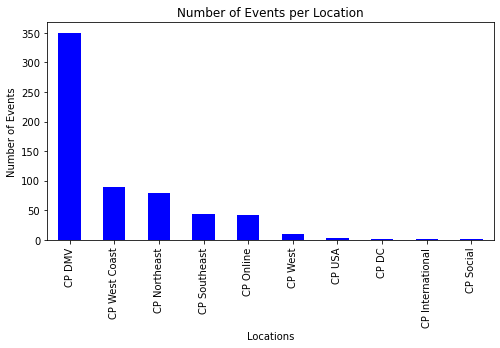

In [29]:
countplace = datafinal.groupby("Area")['Event Name'].agg('count')
print(countplace)

eventsP = datafinal['Area'].value_counts()
eventsP.plot(kind='bar', figsize=(8,4),color='b')

plt.title('Number of Events per Location')
plt.xlabel('Locations')
plt.ylabel('Number of Events')

In [30]:
"""plt.boxplot([three_sigma(data_DMV['First Time Attendees']),three_sigma(data_Campus['First Time Attendees']),three_sigma(data_Westcoast['First Time Attendees']),three_sigma(data_Southeast['First Time Attendees']),three_sigma(data_Northeast['First Time Attendees']),three_sigma(data_Online['First Time Attendees'])],labels=['DMV','Campus','Westcoast','Southeast','Northeast','Online'])
plt.ylabel('First Time Attendees')
plt.show()
"""

"plt.boxplot([three_sigma(data_DMV['First Time Attendees']),three_sigma(data_Campus['First Time Attendees']),three_sigma(data_Westcoast['First Time Attendees']),three_sigma(data_Southeast['First Time Attendees']),three_sigma(data_Northeast['First Time Attendees']),three_sigma(data_Online['First Time Attendees'])],labels=['DMV','Campus','Westcoast','Southeast','Northeast','Online'])\nplt.ylabel('First Time Attendees')\nplt.show()\n"

In [31]:
# Analysis 6. average people of year
meanyr = datafinal.groupby("year")['Participated'].agg('mean')
print(meanyr)

year
2013    209.000000
2014     51.092593
2015     54.518519
2016     61.610169
2017     63.200000
2018     36.489796
2019     34.972826
Name: Participated, dtype: float64


           First Time Attendees
dayofweek                      
Monday                16.974359
Tuesday               19.111111
Wednesday             10.140000
Thursday              10.898148
Friday                16.916667
Saturday              11.628571
Sunday                16.175000
           Percentage First Time Attendees
dayofweek                                 
Monday                            0.258892
Tuesday                           0.273882
Wednesday                         0.268903
Thursday                          0.275011
Friday                            0.279918
Saturday                          0.285137
Sunday                            0.276311
           Major Prospects
dayofweek                 
Monday            3.769231
Tuesday           4.055556
Wednesday         5.820000
Thursday          7.203704
Friday           12.604167
Saturday          5.674286
Sunday            3.925000
           Major Prospects
dayofweek                 
Monday            3.769231
T

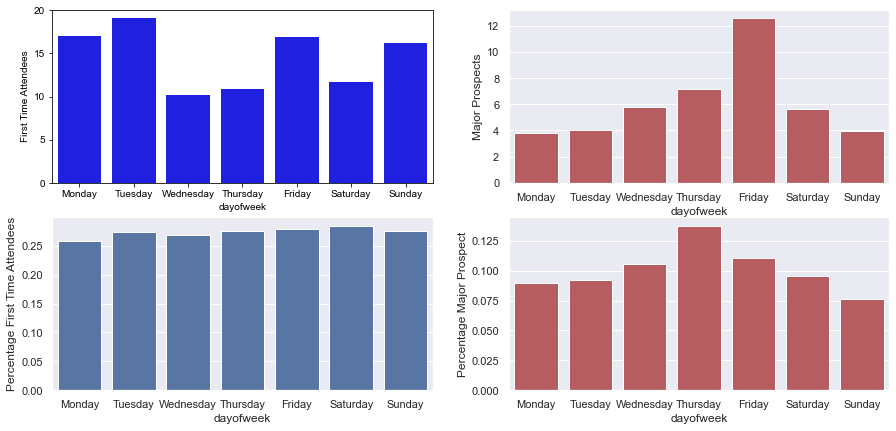

In [32]:
#order by Monday through Sunday
from pandas.api.types import CategoricalDtype
order = CategoricalDtype(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
datafinal['dayofweek'] =datafinal['dayofweek'].astype(order)

GroupbyDayFT = datafinal.groupby("dayofweek", as_index=True)[["First Time Attendees"]].mean()
print(GroupbyDayFT)
GroupbyDayPFT = datafinal.groupby("dayofweek", as_index=True)[["Percentage First Time Attendees"]].mean()
print(GroupbyDayPFT)
GroupbyDayMJ = datafinal.groupby("dayofweek", as_index=True)[["Major Prospects"]].mean()
print(GroupbyDayMJ)
GroupbyDayPMJ = datafinal.groupby("dayofweek", as_index=True)[["Percentage Major Prospect"]].mean()
print(GroupbyDayMJ)

#Plotting 
plt.figure(figsize=(15,7))
plt.subplot(221)
sns.barplot(x="dayofweek", y="First Time Attendees", data=datafinal, estimator=np.mean, ci=None, color='b')
sns.set(rc = {'figure.figsize':(15,8)})
plt.subplot(223)
sns.barplot(x="dayofweek", y="Percentage First Time Attendees", data=datafinal, estimator=np.mean, ci=None, color='b')
sns.set(rc = {'figure.figsize':(15,8)})
plt.subplot(222)
sns.barplot(x="dayofweek", y="Major Prospects", data=datafinal, estimator=np.mean, ci=None, color='r')
sns.set(rc = {'figure.figsize':(15,8)})
plt.subplot(224)
sns.barplot(x="dayofweek", y="Percentage Major Prospect", data=datafinal, estimator=np.mean, ci=None, color='r')
sns.set(rc = {'figure.figsize':(15,8)})

plt.show()

       First Time Attendees
month                      
1                  7.722222
2                  8.787879
3                  9.106667
4                 19.397590
5                 23.459459
6                 10.500000
7                 43.368421
8                  8.068966
9                 12.611111
10                13.426829
11                 9.454545
12                13.189189
       Major Prospects
month                 
1             2.444444
2             4.681818
3             3.960000
4             7.542169
5             7.918919
6             5.815789
7             8.684211
8             1.827586
9             6.277778
10            8.792683
11            4.454545
12            8.243243


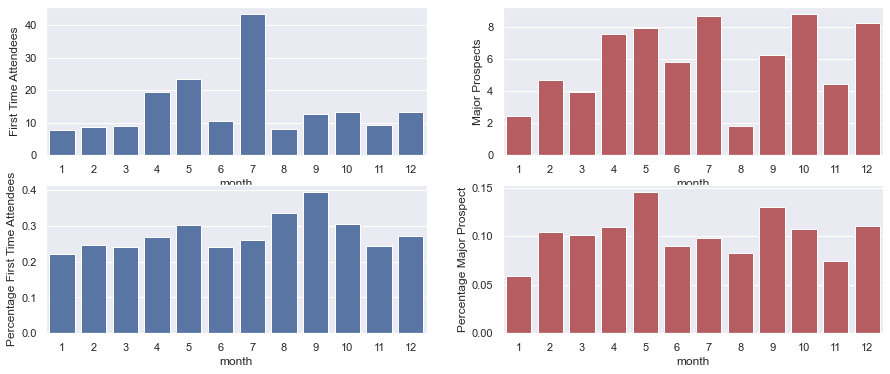

In [33]:
GroupbyMonthFT = datafinal.groupby("month", as_index=True)[["First Time Attendees"]].mean()
print(GroupbyMonthFT)

GroupbyMonthMJ = datafinal.groupby("month", as_index=True)[["Major Prospects"]].mean()
print(GroupbyMonthMJ)

#Plotting 
plt.figure(figsize=(15,6))
plt.subplot(221)
sns.barplot(x="month", y="First Time Attendees", data=datafinal, estimator=np.mean, ci=None, color='b')
sns.set(rc = {'figure.figsize':(15,8)})
plt.subplot(223)
sns.barplot(x="month", y="Percentage First Time Attendees", data=datafinal, estimator=np.mean, ci=None, color='b')
sns.set(rc = {'figure.figsize':(15,8)})
plt.subplot(222)
sns.barplot(x="month", y="Major Prospects", data=datafinal, estimator=np.mean, ci=None, color='r')
sns.set(rc = {'figure.figsize':(15,8)})
plt.subplot(224)
sns.barplot(x="month", y="Percentage Major Prospect", data=datafinal, estimator=np.mean, ci=None, color='r')
sns.set(rc = {'figure.figsize':(15,8)})


plt.show()

### Generating A few Pivot Tables

In [34]:
df_pivotday = pd.pivot_table(datafinal,values="First Time Attendees",index="year",columns="dayofweek",aggfunc=np.mean)
df_pivotday

dayofweek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2013,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
2014,6.000000,18.888889,5.571429,4.200000,11.000000,29.571429,7.800000
2015,32.000000,23.538462,35.125000,16.125000,20.933333,23.700000,17.875000
2016,46.400000,6.833333,18.625000,32.750000,17.600000,31.642857,9.615385
2017,59.200000,6.000000,14.875000,17.222222,56.000000,7.083333,29.000000
2018,5.153846,38.200000,7.390244,10.837838,20.200000,6.169811,38.681818
2019,2.071429,3.421053,4.392857,2.107143,2.416667,1.574074,1.689655


In [35]:
df_pivotmonth = pd.pivot_table(datafinal,values="First Time Attendees",index="month",columns="year",aggfunc=np.mean)
df_pivotmonth

year,2013,2014,2015,2016,2017,2018,2019
month,,,,,,,
1,NaN,NaN,10.250000,9.500000,2.000000,15.375000,3.235294
2,NaN,0.000000,21.600000,7.000000,19.600000,5.000000,2.115385
3,NaN,0.000000,20.500000,9.857143,25.333333,9.250000,1.520000
4,NaN,0.000000,12.846154,29.700000,2.142857,41.040000,4.038462
5,NaN,0.000000,68.000000,32.625000,65.800000,4.733333,3.000000
6,NaN,0.000000,26.000000,25.285714,5.500000,14.428571,3.222222
7,NaN,NaN,NaN,0.500000,20.666667,124.833333,1.500000
8,NaN,37.000000,8.500000,11.000000,NaN,6.000000,2.090909
9,0.0,12.714286,18.250000,68.000000,44.750000,8.500000,2.428571


In [36]:
df_pivotArea = pd.pivot_table(datafinal,values="Percentage First Time Attendees",index="Area",columns="year",aggfunc=np.mean)
print(df_pivotArea)

df_pivotAreaMP = pd.pivot_table(datafinal,values="Percentage Major Prospect",index="Area",columns="year",aggfunc=np.mean)
print(df_pivotAreaMP)

year              2013      2014      2015      2016      2017      2018  \
Area                                                                       
CP DC              NaN       NaN       NaN       NaN       NaN       NaN   
CP DMV             0.0  0.364236  0.471415  0.354886  0.341388  0.380091   
CP International   NaN       NaN       NaN       NaN  0.784091       NaN   
CP Northeast       NaN  0.335181  0.310842  0.284817       NaN  0.196839   
CP Online          NaN       NaN       NaN       NaN  0.391376  0.324127   
CP Social          NaN       NaN       NaN       NaN       NaN       NaN   
CP Southeast       NaN  0.384511  0.351878  0.361232  0.238619  0.327829   
CP USA             NaN       NaN  0.371032       NaN       NaN       NaN   
CP West            NaN       NaN       NaN       NaN       NaN  0.317474   
CP West Coast      NaN  0.596051  0.503808  0.358259  0.487518  0.281256   

year                  2019  
Area                        
CP DC             0.118056  


In [37]:
df_pivotGroup = pd.pivot_table(datafinal,values="Percentage First Time Attendees",index="Group",columns="year",aggfunc=np.mean)
df_pivotGroup

year,2013,2014,2015,2016,2017,2018,2019
Group,,,,,,,
CP Advocacy,NaN,0.000000,NaN,0.358819,0.256202,0.233669,0.052941
CP Affinity,NaN,NaN,NaN,NaN,NaN,0.297596,0.064460
CP Athletics,0.0,0.458790,0.457280,0.297356,0.155352,0.288092,0.084694
CP Campaign,NaN,NaN,NaN,NaN,NaN,NaN,0.106572
CP Career,NaN,NaN,NaN,NaN,NaN,0.187500,NaN
CP Cultivation,NaN,NaN,0.621469,NaN,0.488636,0.365385,0.052885
CP Cultural,NaN,0.500000,NaN,0.400000,0.619048,0.146053,0.070721
CP D&I,NaN,NaN,NaN,NaN,NaN,0.428571,NaN
CP DMV,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [38]:
df_pivotGroupMP = pd.pivot_table(datafinal,values="Percentage Major Prospect",index="Group",columns="year",aggfunc=np.mean)
df_pivotGroupMP

year,2013,2014,2015,2016,2017,2018,2019
Group,,,,,,,
CP Advocacy,NaN,0.135593,NaN,0.124005,0.109852,0.171104,0.069939
CP Affinity,NaN,NaN,NaN,NaN,NaN,0.028846,0.046603
CP Athletics,0.258433,0.175078,0.151986,0.110863,0.127769,0.088866,0.036690
CP Campaign,NaN,NaN,NaN,NaN,NaN,NaN,0.114934
CP Career,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
CP Cultivation,NaN,NaN,0.152542,NaN,0.232955,0.057692,0.024038
CP Cultural,NaN,0.350000,NaN,0.000000,0.000000,0.000000,0.009009
CP D&I,NaN,NaN,NaN,NaN,NaN,0.015873,NaN
CP DMV,NaN,NaN,NaN,NaN,NaN,NaN,0.066667


## Complex Analysis - Important Variables  

In [40]:
datafinal.corr(method='pearson')

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,year,month,day
Participated,1.000000,0.037616,0.835996,0.047840,0.658973,0.113415,-0.109570,0.019270,-0.002515
Average Age,0.037616,1.000000,-0.048204,-0.152633,0.308342,0.549320,-0.057415,0.008201,0.074654
First Time Attendees,0.835996,-0.048204,1.000000,0.281961,0.420884,0.051069,-0.143032,0.006804,-0.047270
Percentage First Time Attendees,0.047840,-0.152633,0.281961,1.000000,0.000751,0.067701,-0.419344,0.086106,-0.063627
Major Prospects,0.658973,0.308342,0.420884,0.000751,1.000000,0.481370,-0.303667,0.060620,0.044416
Percentage Major Prospect,0.113415,0.549320,0.051069,0.067701,0.481370,1.000000,-0.320860,0.007585,0.075520
year,-0.109570,-0.057415,-0.143032,-0.419344,-0.303667,-0.320860,1.000000,-0.138539,0.081161
month,0.019270,0.008201,0.006804,0.086106,0.060620,0.007585,-0.138539,1.000000,-0.151735
day,-0.002515,0.074654,-0.047270,-0.063627,0.044416,0.075520,0.081161,-0.151735,1.000000


In [41]:
"""!pip install dython
from dython import nominal
nominal.associations(datafinal,figsize=(30,20),mark_columns=True);"""

'!pip install dython\nfrom dython import nominal\nnominal.associations(datafinal,figsize=(30,20),mark_columns=True);'

In [42]:
data_DMV=datafinal[datafinal['Area']=='CP DMV']
data_West=datafinal[datafinal['Area']=='CP West']
data_Southeast=datafinal[datafinal['Area']=='CP Southeast']
data_Northeast=datafinal[datafinal['Area']=='CP Northeast']
data_Online=datafinal[datafinal['Area']=='CP Online']

In [43]:
#clean the extreme outliers
def three_sigma(data,n=3):
    mean=np.mean(data)
    sigma=np.std(data)
    new_data=data.drop(data[abs(data-mean)>3*sigma].index)
    return new_data

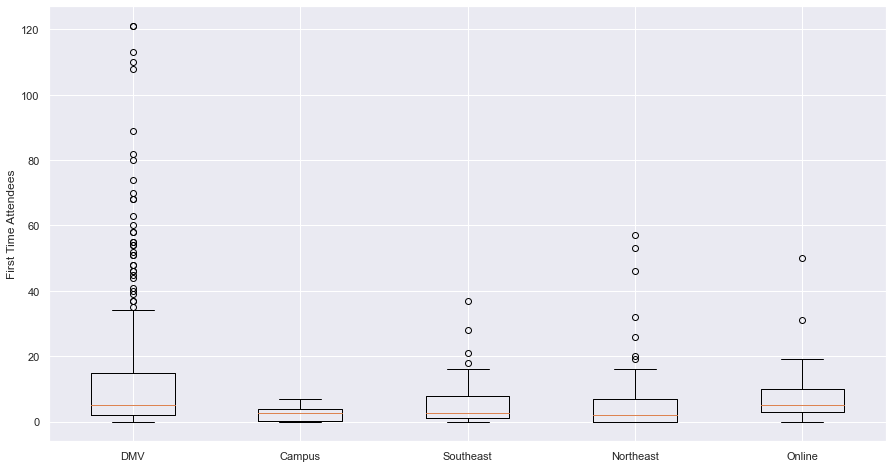

In [44]:
plt.boxplot([three_sigma(data_DMV['First Time Attendees']),three_sigma(data_West['First Time Attendees']),three_sigma(data_Southeast['First Time Attendees']),three_sigma(data_Northeast['First Time Attendees']),three_sigma(data_Online['First Time Attendees'])],labels=['DMV','Campus','Southeast','Northeast','Online'])
plt.ylabel('First Time Attendees')
plt.show()

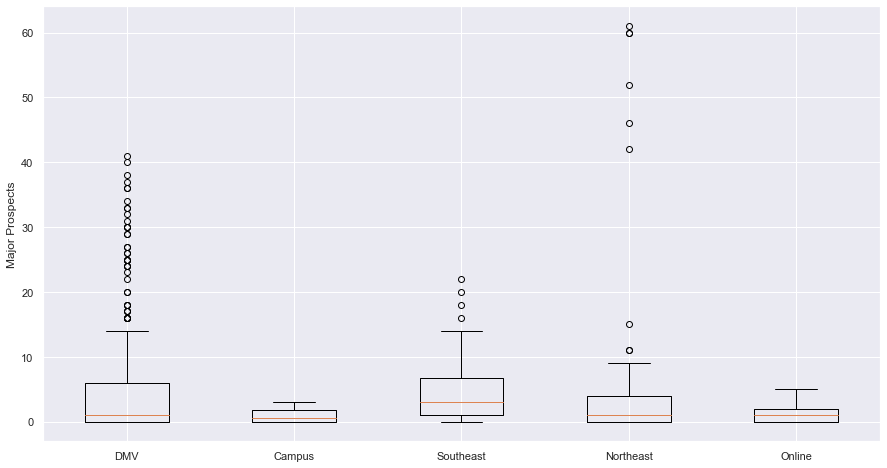

In [45]:
plt.boxplot([three_sigma(data_DMV['Major Prospects']),three_sigma(data_West['Major Prospects']),three_sigma(data_Southeast['Major Prospects']),three_sigma(data_Northeast['Major Prospects']),three_sigma(data_Online['Major Prospects'])],labels=['DMV','Campus','Southeast','Northeast','Online'])
plt.ylabel('Major Prospects')
plt.show()

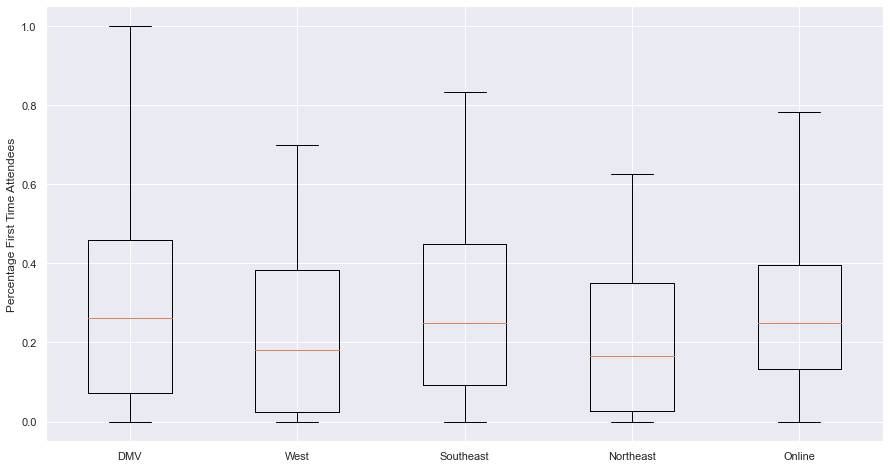

In [46]:
plt.boxplot([three_sigma(data_DMV['Percentage First Time Attendees']),three_sigma(data_West['Percentage First Time Attendees']),three_sigma(data_Southeast['Percentage First Time Attendees']),three_sigma(data_Northeast['Percentage First Time Attendees']),three_sigma(data_Online['Percentage First Time Attendees'])],labels=['DMV','West','Southeast','Northeast','Online'])
plt.ylabel('Percentage First Time Attendees')
plt.show()

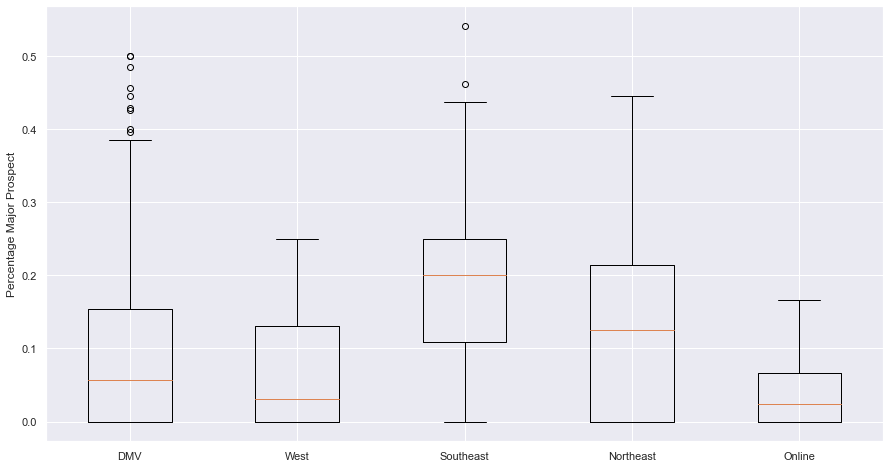

In [47]:
plt.boxplot([three_sigma(data_DMV['Percentage Major Prospect']),three_sigma(data_West['Percentage Major Prospect']),three_sigma(data_Southeast['Percentage Major Prospect']),three_sigma(data_Northeast['Percentage Major Prospect']),three_sigma(data_Online['Percentage Major Prospect'])],labels=['DMV','West','Southeast','Northeast','Online'])
plt.ylabel('Percentage Major Prospect')
plt.show()

### Clustering 

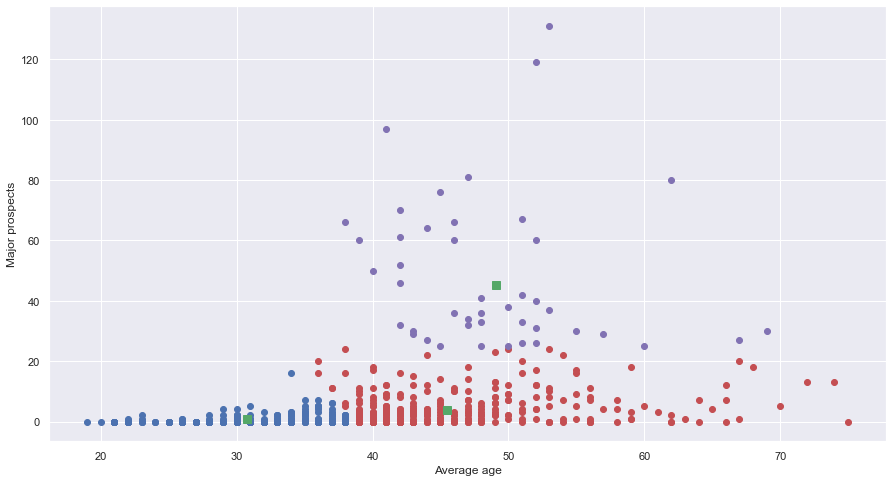

In [48]:
#Do the Kmeans clustering between average age and major prospect and pecentage of it. - Since slightly higher corrrelation than first time attendees 
data=np.array(datafinal[['Average Age','Major Prospects']],dtype='f')
from scipy.cluster.vq import kmeans, vq
# compute k-means with k = 3 (3 clusters)
centroids,_= kmeans(data,3) 
# assign each sample to a cluster
index,_= vq(data,centroids) 
from matplotlib.pyplot import plot, show
# plot different color for each cluster by its index
plot(data[index==0,0],data[index==0,1],'or')
plot(data[index==1,0],data[index==1,1],'ob')
plot(data[index==2,0],data[index==2,1],'om') 
plot(centroids[:,0],centroids[:,1],'sg',markersize=8) 
plt.xlabel('Average age')
plt.ylabel('Major prospects')
plt.show()
#And then see what event can attract people around 40-60

In [49]:
data_40to60=datafinal.loc[(datafinal['Average Age']>40) &(datafinal['Average Age']<60)]
data_Athletics_40to60=data_40to60[datafinal['Group']=='CP Athletics']
data_ProDev_40to60=data_40to60[datafinal['Group']=='CP ProDev']
data_Social_40to60=data_40to60[datafinal['Group']=='CP Social']
data_Service_40to60=data_40to60[datafinal['Group']=='CP Service']
data_Stewardship_40to60=data_40to60[datafinal['Group']=='CP Stewardship']

C:\Users\28149\AppData\Local\Temp/ipykernel_5128/4016024859.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Athletics_40to60=data_40to60[datafinal['Group']=='CP Athletics']
C:\Users\28149\AppData\Local\Temp/ipykernel_5128/4016024859.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_ProDev_40to60=data_40to60[datafinal['Group']=='CP ProDev']
C:\Users\28149\AppData\Local\Temp/ipykernel_5128/4016024859.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Social_40to60=data_40to60[datafinal['Group']=='CP Social']
C:\Users\28149\AppData\Local\Temp/ipykernel_5128/4016024859.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Service_40to60=data_40to60[datafinal['Group']=='CP Service']
C:\Users\28149\AppData\Local\Temp/ipykernel_5128/4016024859.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Stewardship

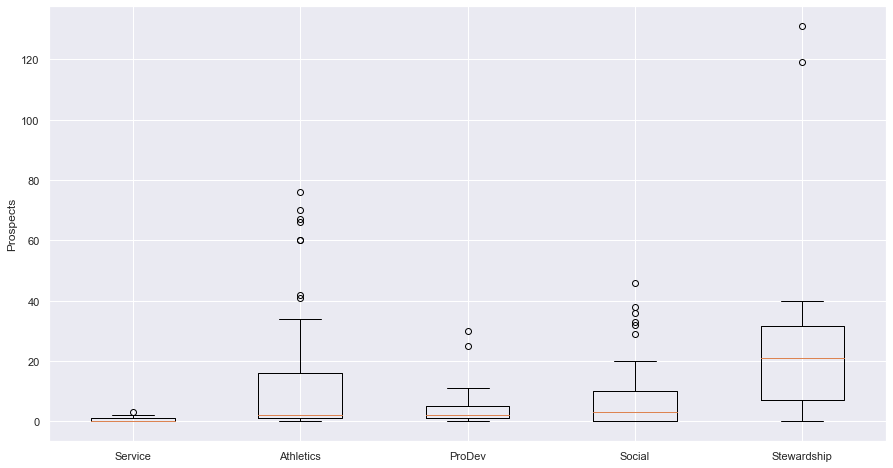

In [50]:
plt.boxplot([three_sigma(data_Service_40to60['Major Prospects']),three_sigma(data_Athletics_40to60['Major Prospects']),three_sigma(data_ProDev_40to60['Major Prospects']),three_sigma(data_Social_40to60['Major Prospects']),three_sigma(data_Stewardship_40to60['Major Prospects'])],labels=['Service','Athletics','ProDev','Social','Stewardship'])
plt.ylabel('Prospects')
plt.show()

In [51]:
#Age less than 40 - event change 
data_40=datafinal.loc[(datafinal['Average Age']<40)]
data_Athletics_40=data_40[datafinal['Group']=='CP Athletics']
data_ProDev_40=data_40[datafinal['Group']=='CP ProDev']
data_Social_40=data_40[datafinal['Group']=='CP Social']
data_Service_40=data_40[datafinal['Group']=='CP Service']
data_Stewardship_40=data_40[datafinal['Group']=='CP Stewardship']

C:\Users\28149\AppData\Local\Temp/ipykernel_5128/283972578.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Athletics_40=data_40[datafinal['Group']=='CP Athletics']
C:\Users\28149\AppData\Local\Temp/ipykernel_5128/283972578.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_ProDev_40=data_40[datafinal['Group']=='CP ProDev']
C:\Users\28149\AppData\Local\Temp/ipykernel_5128/283972578.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Social_40=data_40[datafinal['Group']=='CP Social']
C:\Users\28149\AppData\Local\Temp/ipykernel_5128/283972578.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Service_40=data_40[datafinal['Group']=='CP Service']
C:\Users\28149\AppData\Local\Temp/ipykernel_5128/283972578.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Stewardship_40=data_40[datafinal['Group']=='CP S

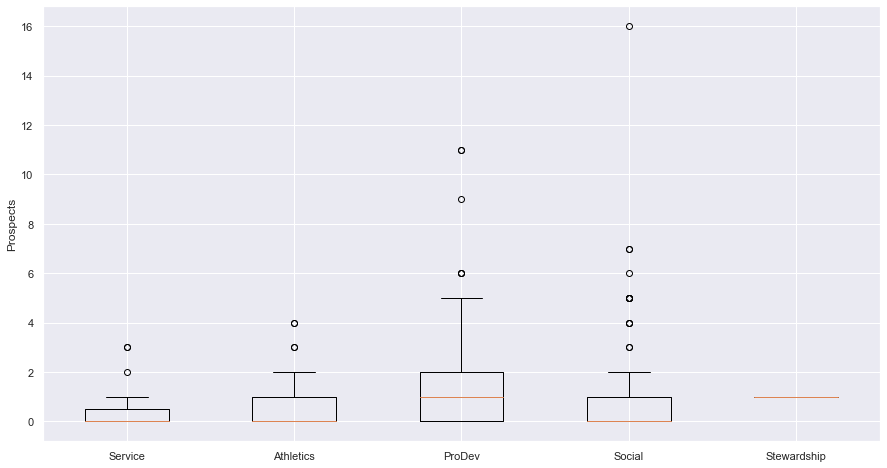

In [52]:
plt.boxplot([three_sigma(data_Service_40['Major Prospects']),three_sigma(data_Athletics_40['Major Prospects']),three_sigma(data_ProDev_40['Major Prospects']),three_sigma(data_Social_40['Major Prospects']),three_sigma(data_Stewardship_40['Major Prospects'])],labels=['Service','Athletics','ProDev','Social','Stewardship'])
plt.ylabel('Prospects')
plt.show()

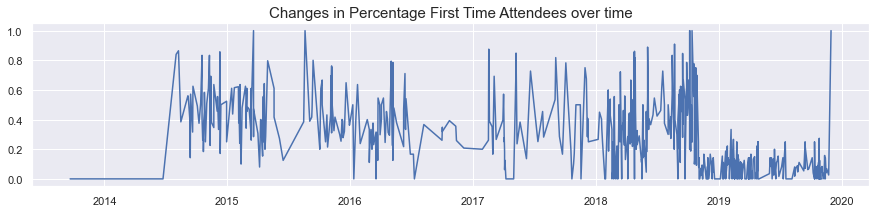

In [53]:
# Historic time series graph -- 1st time attendees
import matplotlib.pyplot as plt
datafinal1 = datafinal.sort_values(by = 'Event Date')
plt.figure(figsize=(15,3))
plt.plot('Event Date', 'Percentage First Time Attendees', data=datafinal1, color='b')
plt.title("Changes in Percentage First Time Attendees over time", fontsize=15)
plt.show()


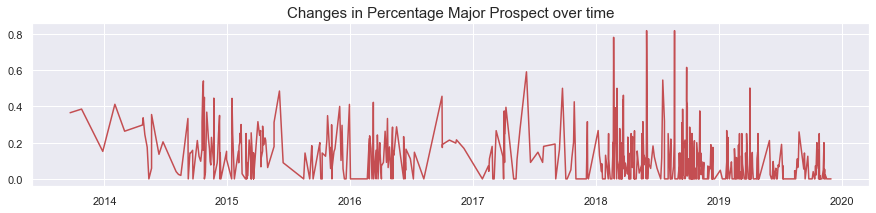

In [54]:
# Historic time series graph -- 1st time attendees
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.plot('Event Date', 'Percentage Major Prospect', data=datafinal1, color='r')
plt.title("Changes in Percentage Major Prospect over time", fontsize=15)
plt.show()